In [2]:
# Run this cell first if you intend to run other Python cells later.
# This cell notwithstanding, all other cells are independent.
# If you are only reading the text and equations, you don't have to run this cell.
import numpy as np
import matplotlib.pyplot as plt

### Matrix shapes

#### Overview
This section describes the shape (dimensions) of common matrices in a neural network.

#### X: Input dataset
Each column is a training example and each row is a feature. The transpose of this matrix is used for linear and logistic regression analyses with sklearn. The number of training examples is $m$ and the number of input features is either $n_0$ or $n_x$. If each training example is a multi-dimensional array, such as a grayscale image (2D: length x width) or color image (3D: length x width x 3 RBG channels), it must be unrolled into a column vector whereby the number of rows is equal to the production of all dimensions.

$$
X ({n_0}, m) = A^{[0]} =
\begin{bmatrix}
x^{(1)}_1 & x^{(2)}_1 & \cdots & x^{(m)}_1 \\
x^{(1)}_2 & x^{(2)}_2 & \cdots & x^{(m)}_2 \\
\vdots & \vdots & \ddots & \vdots \\
x^{(1)}_{n_0} & x^{(2)}_{n_0} & \cdots & x^{(m)}_{n_0}
\end{bmatrix}
$$

#### Y: Expected outputs/labels
For linear and logistic regression problems, there will be a "right answer" corresponding to each training example. These neural networks will have a single unit in the output layer $(n_L=1)$. A multi-class problem (e.g. softmax) will also have one label per training example, although it is commonly one-hot encoded (OHE) into one label per class, represented by rows. This corresponds to one unit per class in the output layer of the neural network. Likewise, a multi-label problem (e.g. many yes/no questions at once) will have a similar shape, albeit without the one-hot restriction. Predictions/inferences from the model are stored in $\hat{y}$ or "y-hat" which always has the same shape as $y$ once OHE, if required, is complete.

$$
\begin{align}
Y_{singleclass} (1, m) & =
\begin{bmatrix}
y^{(1)} & y^{(2)} & \cdots & y^{(m)} \\
\end{bmatrix} \\
y_{multiclass} (n_L, m) & =
\begin{bmatrix}
y^{(1)}_1 & y^{(2)}_1 & \cdots & y^{(m)}_1 \\
y^{(1)}_2 & y^{(2)}_2 & \cdots & y^{(m)}_2 \\
\vdots & \vdots & \ddots & \vdots \\
y^{(1)}_{n_L} & y^{(2)}_{n_L} & \cdots & y^{(m)}_{n_L}
\end{bmatrix}
\end{align}
$$

#### W: Weights
Each value corresponds to an edge, interconnecting units from the current layer to units in the previous layer. The rows correspond to the current layer's units while the columns correspond to the previous layer's units. Note that this matrix is a function of the neural network architecture and not a function of the training example quantity. No $W$ matrix ever has a dimension of $m$.

$$
W^{[l]} (n_l, {n_{l-1}}) =
\begin{bmatrix}
w_{1,1} & w_{1,2} & \cdots & w_{1,n_{l-1}} \\
w_{2,1} & w_{2,2} & \cdots & w_{2,n_{l-1}} \\
\vdots & \vdots & \ddots & \vdots \\
w_{n_l,1} & w_{n_l,2} & \cdots & w_{n_l,n_{l-1}}
\end{bmatrix}
$$

#### b: Biases:
A column vector with a value for each unit in the current layer. Like weights, the shape of this matrix depends upon the neural network's architecture (current layer only) and not the number of training examples $m$.

$$
b^{[l]} (n_l, 1)=
\begin{bmatrix}
b_1 \\
b_2 \\
\vdots \\
b_{n_l} \\
\end{bmatrix}
$$

#### Z: Linear outputs
The algebraic combination of weights, biases, and previous layer activations. At the first layer, the previous layer activations is equal to $X$, the input data. Each column corresponds to a training example just like $X$ and $Y$ while the rows correspond to the number of units in the current layer.

$$
Z^{[l]} (n_l, m)=
\begin{bmatrix}
z^{(1)}_1 & z^{(2)}_1 & \cdots & z^{(m)}_1 \\
z^{(1)}_2 & z^{(2)}_2 & \cdots & z^{(m)}_2 \\
\vdots & \vdots & \ddots & \vdots \\
z^{(1)}_{n_l} & z^{(2)}_{n_l} & \cdots & z^{(m)}_{n_l}
\end{bmatrix}
$$

#### A: Activations
A transform function that enables a layer to represent the linear output in a more meaningful way to the next layer. Same shape as $Z$.

$$
A^{[l]} (n_l, m)=
\begin{bmatrix}
a^{(1)}_1 & a^{(2)}_1 & \cdots & a^{(m)}_1 \\
a^{(1)}_2 & a^{(2)}_2 & \cdots & a^{(m)}_2 \\
\vdots & \vdots & \ddots & \vdots \\
a^{(1)}_{n_l} & a^{(2)}_{n_l} & \cdots & a^{(m)}_{n_l}
\end{bmatrix}
$$

### Weight Initialization

#### Overview
Proper initialization of weights is necessary to prevent exploding and vanishing gradient problems in deep neural networks (those with many layers). Derivatives used during back propagation can become too large (exploding), which causes divergence, if the weights are initialized too large. They can also become too small (vanishing), which causes an inability to converge, if the weights are initialized too small. Initializing the weights with values slightly less than 1 and slightly greater than 1 mitigates the problem, although does not completely solve it.

Additionally, weight initialization avoids the "symmetry" problem whereby by every units learns the same thing, reducing the entire neural network to a single unit. Such a model is only as powerful as linear or logistic regression in isolation. Note that you can also initialize biases the same way. It is common to initialize biases to zero as this will not inhibit a model's ability to learn.

In the formulas that follow, $\mathcal{N}$ refers to a normal (Gaussian) distribution of random values matching the proper matrix shape at a given layer.

#### Xavier
This method works best on layers using the linear, sigmoid, tanh, or softmax activation functions. As $n_{l-1}$ increases (which represents a more populous previous layer), the resulting vector values creep closer to zero.

$$
W^{[l]}_{init} = \mathcal{N} \cdot \sqrt{\frac{1}{n_{l-1}}}
$$

In [24]:
norm = np.random.randn(2, 5)
print(f"norm distro\n{norm}")
for prev_n in np.array([10, 20, 50]):
    print(f"\nn_l-1 = {prev_n}\n{norm * np.sqrt(1/prev_n)}")

norm distro
[[ 0.81864815 -0.36756374  0.57888394 -1.17114903  0.35019266]
 [ 1.80808102  0.28277911  3.44489369  0.17367235 -0.02109767]]

n_l-1 = 10
[[ 0.25887928 -0.11623386  0.18305918 -0.37034984  0.11074064]
 [ 0.57176542  0.08942261  1.08937103  0.05492002 -0.00667167]]

n_l-1 = 20
[[ 0.18305529 -0.08218975  0.12944238 -0.26187689  0.07830546]
 [ 0.40429921  0.06323133  0.77030165  0.03883432 -0.00471758]]

n_l-1 = 50
[[ 0.11577433 -0.05198136  0.08186655 -0.16562548  0.04952472]
 [ 0.25570127  0.039991    0.48718154  0.02456098 -0.00298366]]


#### Normalized Xavier
This method is similar to Xavier except it considers both the input and output unit counts (sometimes called "fan in" and "fan out") between layers. If these two terms are equal, it yields identical results as Xavier. As the $(n_{l-1} + n_l)$ denominator term increases, the resulting vector values creep closer to zero.

$$
W^{[l]}_{init} = \mathcal{N} \cdot \sqrt{\frac{2}{n_{l-1} + n_l}}
$$

In [25]:
norm = np.random.randn(2, 5)
cur_n = 20
print(f"norm distro\n{norm}")
for prev_n in np.array([10, 20, 50]):
    print(f"\nn_l-1 = {prev_n}, n_l = {cur_n}\n{norm * np.sqrt(2/(prev_n + cur_n))}")

norm distro
[[ 0.35772436 -0.34208448 -0.11469337 -0.73463898  0.2759994 ]
 [ 0.7148769  -0.24277462  0.650629    0.63207323  0.9340581 ]]

n_l-1 = 10, n_l = 20
[[ 0.09236403 -0.08832583 -0.0296137  -0.18968297  0.07126274]
 [ 0.18458042 -0.06268414  0.16799169  0.16320061  0.24117276]]

n_l-1 = 20, n_l = 20
[[ 0.0799896  -0.07649241 -0.02564622 -0.16427027  0.06171534]
 [ 0.15985133 -0.05428605  0.14548507  0.14133587  0.20886174]]

n_l-1 = 50, n_l = 20
[[ 0.06046645 -0.05782283 -0.01938672 -0.12417665  0.04665241]
 [ 0.12083625 -0.0410364   0.10997637  0.10683988  0.15788463]]


#### He 何
This method works best on layers using the ReLU activation function (and its variants). It is very similar to Xavier except uses 2 as the numerator instead of 1. This yields slightly smaller movements towards zero when compared to Xavier given the larger numerator.

$$
W^{[l]}_{init} = \mathcal{N} \cdot \sqrt{\frac{2}{n_{l-1}}}
$$

In [30]:
norm = np.random.randn(2, 5)
print(f"norm distro\n{norm}")
for prev_n in np.array([10, 20, 50]):
    print(f"\nn_l-1 = {prev_n}\n{norm * np.sqrt(2/prev_n)}")

norm distro
[[-1.1373844   0.46465876 -0.57248895  0.16195855  1.32836365]
 [-0.11243882 -0.85070718 -0.8383678   0.5997525  -0.20800406]]

n_l-1 = 10
[[-0.50865377  0.20780172 -0.25602484  0.07243006  0.59406228]
 [-0.05028417 -0.38044782 -0.37492948  0.26821747 -0.09302224]]

n_l-1 = 20
[[-0.35967253  0.146938   -0.1810369   0.05121579  0.42006547]
 [-0.03555628 -0.26901723 -0.26511518  0.18965839 -0.06577666]]

n_l-1 = 50
[[-0.22747688  0.09293175 -0.11449779  0.03239171  0.26567273]
 [-0.02248776 -0.17014144 -0.16767356  0.1199505  -0.04160081]]


### Activation Functions

#### Overview
This section describes activation functions applied to the linear outputs $Z$ to yield $A$, plus their derivatives. Note that the following generic, non-annotated, non-vectorized formula is true for all activations. The superscripts and subscripts may vary as the context changes. This equation is not repeated for individual activation summaries below.

$$
z = w \cdot x + b
$$

#### Linear/None
Returns the input $z$ unchanged. Not useful in a hidden layer, but could be used at the final layer for linear regression.

$$
\begin{align}
g(z) & = z \\
\frac{\partial g(z)}{\partial z} & = 1
\end{align}
$$

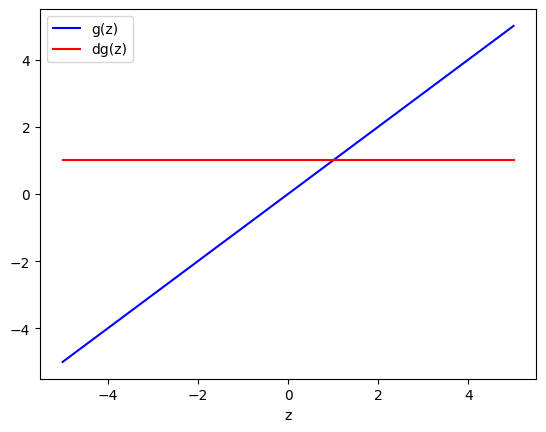

In [34]:
def g_linear(z):
    return z

def dg_linear(z):
    return np.ones(z.shape)

z_in = np.linspace(-5, 5, 100)
plt.plot(z_in, g_linear(z_in), color="b", label="g(z)")
plt.plot(z_in, dg_linear(z_in), color="r", label="dg(z)")
plt.xlabel("z"); plt.legend(); plt.show()

#### Sigmoid
Returns values between 0 and 1 with most values being close to those two asymptotes. This value corresponds to the probability that $y = 1$. Typically used in the final layer for logistic regression (binary classification).

$$
\begin{align}
g(z) & = \frac{1}{1+e^{-z}} \\
\frac{\partial g(z)}{\partial z} & = g(z) \cdot (1 - g(z))
\end{align}
$$

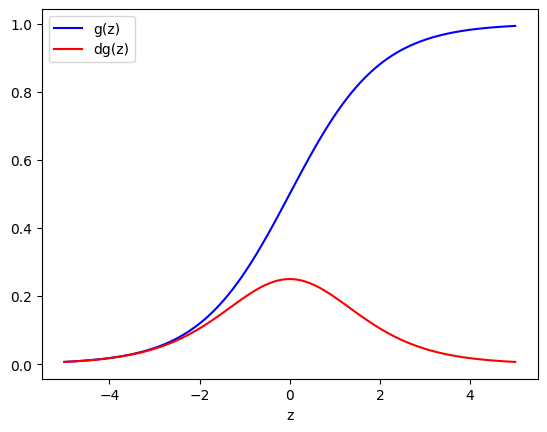

In [33]:
def g_sigmoid(z):
    return 1 / (1 + np.exp(-z))

def dg_sigmoid(z):
    gz = g_sigmoid(z)
    return np.multiply(gz, 1 - gz)

z_in = np.linspace(-5, 5, 100)
plt.plot(z_in, g_sigmoid(z_in), color="b", label="g(z)")
plt.plot(z_in, dg_sigmoid(z_in), color="r", label="dg(z)")
plt.xlabel("z"); plt.legend(); plt.show()

#### Rectified Linear Unit (ReLU)
Like the linear activation, returns the input $z$ unchanged when $z$ is positive. When $z$ is negative, returns 0. The function is technically undefined when $z = 0$, but most implementations will return 0 for simplicity.

$$
\begin{align}
g(z) = &
\begin{cases}
z \lt 0: & 0 \\
z \ge 0: & z
\end{cases} \\
\frac{\partial g(z)}{\partial z} = &
\begin{cases}
z \lt 0: & 0 \\
z \ge 0: & 1
\end{cases}
\end{align}
$$

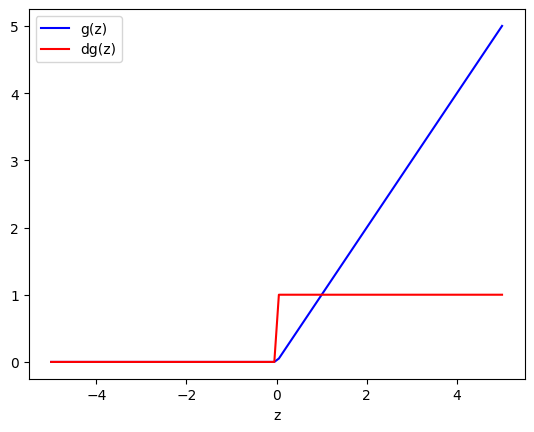

In [35]:
def g_relu(z):
    return z * (z > 0)

def dg_relu(z):
    return 1.0 * (z > 0)

z_in = np.linspace(-5, 5, 100)
plt.plot(z_in, g_relu(z_in), color="b", label="g(z)")
plt.plot(z_in, dg_relu(z_in), color="r", label="dg(z)")
plt.xlabel("z"); plt.legend(); plt.show()

#### Leaky ReLU
Like the ReLU activation, except when $z$ is negative, returns a small positive number. This allows $z$ values to be preserved but heavily discounted.

$$
\begin{align}
g(z) = &
\begin{cases}
z \lt 0: & 0.01z \\
z \ge 0: & z
\end{cases} \\
\frac{\partial g(z)}{\partial z} = &
\begin{cases}
z \lt 0: & 0.01 \\
z \ge 0: & 1
\end{cases}
\end{align}
$$

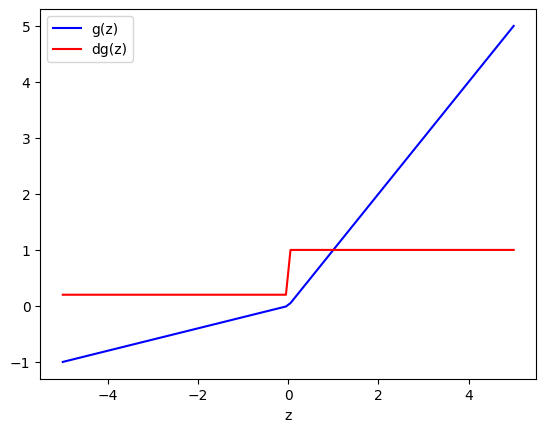

In [4]:
# Note: Large neg_slope used for visual aid only

def g_leakyrelu(z, neg_slope=0.2):
    return np.where(z > 0, z, neg_slope * z)

def dg_leakyrelu(z, neg_slope=0.2):
    return np.where(z > 0, 1, neg_slope)

z_in = np.linspace(-5, 5, 100)
plt.plot(z_in, g_leakyrelu(z_in), color="b", label="g(z)")
plt.plot(z_in, dg_leakyrelu(z_in), color="r", label="dg(z)")
plt.xlabel("z"); plt.legend(); plt.show()

#### Hyperbolic tangent (tanh)
Similar in shape to the sigmoid function, it returns values between -1 and 1. The theoretical mean of the activation results is closer to 0, compared to 0.5 with sigmoid.
$$
\begin{align}
g(z) & = \frac{e^z - e^{-z}}{{e^z} + e^{-z}} \\
\frac{\partial g(z)}{\partial z} & = 1 - g(z)^{2}
\end{align}
$$

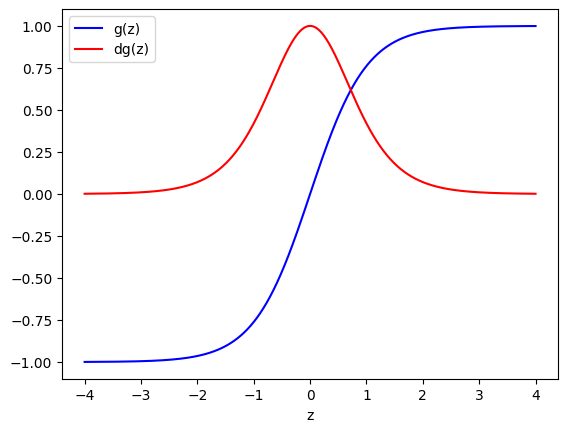

In [45]:
def g_tanh(z):
    epz = np.exp(z)
    enz = np.exp(-z)
    return (epz - enz)/(epz + enz)

def dg_tanh(z):
    return 1 - np.square(g_tanh(z))

z_in = np.linspace(-4, 4, 10000)
plt.plot(z_in, g_tanh(z_in), color="b", label="g(z)")
plt.plot(z_in, dg_tanh(z_in), color="r", label="dg(z)")
plt.xlabel("z"); plt.legend(); plt.show()

#### Softmax
Across $k$ units (classes) in a layer, returns values between 0 and 1 corresponding to the probability of a match for each class. The sum of all activation values is one. Typically used in the final layer for softmax regression (multiple class classification). Cannot be easily visualized as it typically has many dimensions.

$$
\begin{align}
g(z_{j}) & = \frac{e^{z_{j}}}{\sum^{n}_{k=1}{e^{z_{k}}}} = P(y = j|\vec{x}) \\
\frac{\partial g(z_{j})}{\partial z_{j}} & = g(z_{j}) \cdot (1 - g(z_{j})) \\
\frac{\partial g(z_{j})}{\partial z_{k}} & = -g(z_{j}) \cdot g(z_{k})
\end{align}
$$

### Fit Analysis

#### Overview
This section describes the criteria for identifying underfitting and overfitting models. Definitions:
  1. $J_{human}$: human baseline performance
  2. $J_{train}$: total cost of training set
  3. $J_{cv}$: total cost of cross validation (aka development or dev) set

#### Visualization
Use the plot below to visualize the following text descriptions.

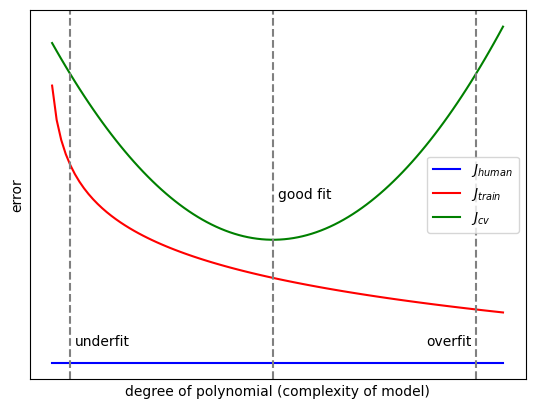

In [5]:
# Note: imprecise numbers and curves; conceptual only
error_in = np.linspace(0.1, 10.1, 100)
plt.plot(error_in, np.ones(error_in.shape), color="b", label="$J_{human}$")
plt.plot(error_in, -np.log(error_in) * 0.3 + 2, color="r", label="$J_{train}$")
plt.plot(error_in, 0.05 * np.square(error_in) - error_in/2 + 3, color="g", label="$J_{cv}$")
plt.axvline(x=5, color="gray", linestyle="--"); plt.text(5.1,2,"good fit")
plt.axvline(9.5, color="gray", linestyle="--"); plt.text(8.4,1.1,"overfit")
plt.axvline(0.5, color="gray", linestyle="--"); plt.text(0.6,1.1,"underfit")
plt.xticks([]); plt.yticks([])
plt.xlabel("degree of polynomial (complexity of model)"); plt.ylabel("error"); plt.legend(); plt.show()

#### Test for "good" fit
If the errors of the training and cross validation sets are close to the human baseline, the model is a good fit. Both the bias and variance are low.

$$
J_{human} \approx J_{train} \approx J_{cv}
$$

Note that the human baseline error may still be significantly better than the training and cross validation errors. This is acceptable if the training and cross validation errors are tolerably low and do not suggest an underfit.

$$
J_{human} \lesssim J_{train } \lesssim J_{cv}
$$

#### Test for underfit
If the error of the training set is far higher than human baseline, and the error of the cross validation set is equally high, the model has underfitted to the training set. The model consistently makes poor predictions on any kind of input. Consider adding features, creating polynomial features to match more complex curves, or removing/decreasing regularization. It is not recommended to remove training examples at random. Also known as "high bias".

$$
\begin{align}
J_{human} & \ll J_{train} \\
J_{train} & \approx J_{cv}
\end{align}
$$

#### Test for overfit
If the error of the training set is close to the human baseline, but the error of the cross validation set is far higher than both, the model has overfitted to the training set. It will likely generalize poorly to unseen inputs and make inaccurate predictions. Consider adding training examples, removing features, or applying/increasing regularization. Also known as "high variance".

$$
\begin{align}
J_{human} & \approx J_{train} \\
J_{train} & \ll J_{cv}
\end{align}
$$

#### Test for "worst" fit
If the error of the training set is far higher than human baseline, and the error of the cross validation set is far higher the training error, the model exhibits high bias and high variance simultaneously. This is a rare case that appears impossible to depict in two dimensions. Try to isolate and resolve the bias problem first, then move on to fixing the variance problem.

$$
J_{human} \ll J_{train} \ll J_{cv}
$$

### Regularization

#### Overview
This section contains techniques to regularize (desensitize) an overfitted model. Regularization reduces the impact of the weights applied to each feature, sometimes entirely eliminating features. Note that this only applies to training, not predictions.

Use this conceptual plot to see how $\lambda$ impacts the quality of a model's fit to various data sets.

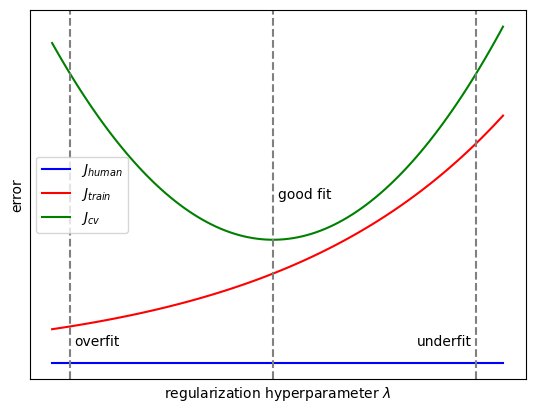

In [26]:
# Note: imprecise numbers and curves; conceptual only
error_in = np.linspace(0.1, 10.1, 100)
plt.plot(error_in, np.ones(error_in.shape), color="b", label="$J_{human}$")
plt.plot(error_in, np.exp(error_in/5)/5 + 1, color="r", label="$J_{train}$")
plt.plot(error_in, 0.05 * np.square(error_in) - error_in/2 + 3, color="g", label="$J_{cv}$")
plt.axvline(x=5, color="gray", linestyle="--"); plt.text(5.1,2,"good fit")
plt.axvline(9.5, color="gray", linestyle="--"); plt.text(8.2,1.1,"underfit")
plt.axvline(0.5, color="gray", linestyle="--"); plt.text(0.6,1.1,"overfit")
plt.xticks([]); plt.yticks([])
plt.xlabel("regularization hyperparameter $\lambda$"); plt.ylabel("error"); plt.legend(); plt.show()

#### LASSO (L1 norm)
Short for Least Absolute Shrinkage and Selection Operator. It sums the absolute values of the weights and can perform automatic feature selection by applying a weight of 0 to certain features. Use this method when there are many useless/nonpredictive features.

General definition:

$$
\|W\|_{1}=\lambda \cdot {\sum\limits^{n}_{i=1}{|W_{n}|}}
$$

Adaptation to combine with a given cost function, and its derivative with respect to a specific weight $w_j$, as the "regularization term". Note that $|w_j|$ cannot be derivated (and thus cannot be represented in closed-form) as the function is not continuous.

$$
\begin{align}
J_{\vec{w},b}(\vec{x}^{(i)}) & := J_{\vec{w},b}(\vec{x}^{(i)}) +
\biggl(\frac{1}{m} \cdot \|\vec{w}\|_{1}\biggr) \\
J_{\vec{w},b}(\vec{x}^{(i)}) & := J_{\vec{w},b}(\vec{x}^{(i)}) +
\biggl(\frac{\lambda}{m} \cdot {\sum\limits^{n}_{i=1}{|\vec{w}_{n}|}}\biggr) \\
\frac{\partial}{\partial w_j}J_{\vec{w},b}(\vec{x}^{(i)}) & := \frac{\partial}{\partial w_j}J_{\vec{w},b}(\vec{x}^{(i)}) +
\frac{\lambda}{m} \cdot
\begin{cases}
w_j \neq 0: & \frac{w_j}{|w_j|} \\
w_j = 0: & \text{undefined}
\end{cases}
\end{align}
$$

#### Ridge (L2 norm)
It sums the squares of the weights. Use this method to reduce the impact of weights without eliminating them entirely. Ridge is more commonly used than LASSO for this reason. It's also called the Frobenius norm.

General definition:

$$
\|W\|_{2}=\lambda \cdot {\sum\limits^{n}_{i=1}{(W_{n})^2}}
$$

Adaptation to combine with a given cost function, and its derivative with respect to a specific weight $w_j$, as the "regularization term":

$$
\begin{align}
J_{\vec{w},b}(\vec{x}^{(i)}) & := J_{\vec{w},b}(\vec{x}^{(i)}) +
\biggl(\frac{1}{2m} \cdot \|\vec{w}\|_{2}\biggr) \\
J_{\vec{w},b}(\vec{x}^{(i)}) & := J_{\vec{w},b}(\vec{x}^{(i)}) +
\biggl(\frac{\lambda}{2m} \cdot {\sum\limits^{n}_{i=1}{(\vec{w}_{n})}^2}\biggr) \\
\frac{\partial}{\partial w_j}J_{\vec{w},b}(\vec{x}^{(i)}) & := \frac{\partial}{\partial w_j}J_{\vec{w},b}(\vec{x}^{(i)}) +
\frac{\lambda}{m} \cdot w_j
\end{align}
$$

#### Dropout
Randomly deactivate certain units in a neural network layer for a given iteration of gradient descent. This makes layers more sparse and the remaining units are trained normally. When applied, the model cannot rely heavily on a single feature as the weight values are spread out. Dropout is commonly used in computer vision as there is rarely enough data, making overfitting common.

Most implementations define a `keep_prob` input, identifying the probability that any given unit remains in service. Other implementations define a `drop_prob` input, identifying the probability that any given unit is dropped from service. Focusing on the `keep_prob` logic, the range is $\{p \in \mathbb{R}\,|\,0 \lt p \le 1\}$. Setting `keep_prob = 1` disables dropout. It is specified on a per-layer basis, and it typically limited to hidden layers. Applying dropout to the input layer means discarding entire features. Applying dropout to the output layer means discarding categorical classes in a softmax regression, for example.

It is also common to divide the resulting activation matrix $A$ by the `keep_prob` so that the activation values more closely resemble results from the "full" layer. This specific implementation is known as "inverted dropout".

Because the neural network is different at each iteration of gradient descent, there is no well-defined cost function. Thus, the training and cost cannot be plotted to ensure it continuously decreases. To troubleshoot a model using dropout, set `keep_prob = 1` to temporarily disable dropout, ensure the cost function decreases at each iteration, then re-enable it.


#### Other Techniques
Overfitting can sometimes be solved by supplying additional training examples. Sometimes, sufficient data simply does not exist. Instead, you can create additional examples that are realistic representations of real data. Using the computer vision example, you can flip a picture horizontally or vertically, or perform slight rotations, to create variants of an existing image. Other distortions, such as crops, stretches, and minor color changes can also help. Not all of these techniques are universally valid. For example, if you are training a model to recognize human faces, you would not flip images vertically as it would yield upside down faces. Synthesizing training examples is not mutually exclusive with the aforementioned regularization methods.

You can also stop the gradient descent process early, preferably when the difference between the cross-validation error and training error is minimized. This is depicted as "good fit" in the conceptual plot. First, train the model and plot both the training and cross-validation error curves. Then, find the required minimum and stop the process after the correct number of iterations. The drawback of this solution is that it is tightly couples the training and regularization processes. It limits future options because if you want to modify the training process, you may also inadvertently impact the regularization process. Many experts prefer to use a dedicated regularization method to separate these two efforts (ie, to keep them orthogonal).

### Forward Propagation

#### Overview
This section describes the prediction/inference process of a neural network.

#### Computing Z
Each unit performs two steps in series. First, the linear outputs are computed using the formula below. The dot product of matrices $W^{[l]}$ and $A^{[l-1]}$ yields a matrix of shape $(n_l,n_{l-1}) \bullet (n_{l-1},m) = (n_l,m)$. In order for matrix multiplication to work, the number of columns in $W^{[l]}$ must match the number of rows in $A^{[l-1]}$, which is always equal to the number of units in the previous layer $n_{l-1}$. Adding the column vector $b^{[l]}$ retains the same shape, but applies the bias values on a per column basis. Superscript $[l]$ notations are omitted from the individual matrix elements for cleanliness.

$Z^{[l]} = W^{[l]} \bullet A^{[l-1]} + b^{[l]}$

First layer matrix expansion for $X = A^{[0]}$.

$$
\begin{align}
Z^{[1]} & = 
\begin{bmatrix}
z^{(1)}_1 & z^{(2)}_1 & \cdots & z^{(m)}_1 \\
z^{(1)}_2 & z^{(2)}_2 & \cdots & z^{(m)}_2 \\
\vdots & \vdots & \ddots & \vdots \\
z^{(1)}_{n_l} & z^{(2)}_{n_l} & \cdots & z^{(m)}_{n_l}
\end{bmatrix}
{=}
\begin{bmatrix}
w_{1,1} & w_{1,2} & \cdots & w_{1,n_{l-1}} \\
w_{2,1} & w_{2,2} & \cdots & w_{2,n_{l-1}} \\
\vdots & \vdots & \ddots & \vdots \\
w_{n_l,1} & w_{n_l,2} & \cdots & w_{n_l,n_{l-1}}
\end{bmatrix}
\bullet
\begin{bmatrix}
x^{(1)}_1 & x^{(2)}_1 & \cdots & x^{(m)}_1 \\
x^{(1)}_2 & x^{(2)}_2 & \cdots & x^{(m)}_2 \\
\vdots & \vdots & \ddots & \vdots \\
x^{(1)}_{n_0} & x^{(2)}_{n_0} & \cdots & x^{(m)}_{n_0}
\end{bmatrix}
{+}
\begin{bmatrix}
b_1 \\
b_2 \\
\vdots \\
b_{n_l}
\end{bmatrix} \\
Z^{[1]} & = 
\begin{bmatrix}
% first row
\sum\limits^{n_{l-1}}_{j=1}{(w_{1,j} \cdot x^{(1)}_j)} + b_1 &
\sum\limits^{n_{l-1}}_{j=1}{(w_{1,j} \cdot x^{(2)}_j)} + b_1 & \cdots & 
\sum\limits^{n_{l-1}}_{j=1}{(w_{1,j} \cdot x^{(m)}_j)} + b_1 \\
% second row
\sum\limits^{n_{l-1}}_{j=1}{(w_{2,j} \cdot x^{(1)}_j)} + b_2 & 
\sum\limits^{n_{l-1}}_{j=1}{(w_{2,j} \cdot x^{(2)}_j)} + b_2 & \cdots &
\sum\limits^{n_{l-1}}_{j=1}{(w_{2,j} \cdot x^{(m)}_j)} + b_2 \\
% third row
\vdots & \vdots & \ddots & \vdots \\
% fourth row
\sum\limits^{n_{l-1}}_{j=1}{(w_{n_l,j} \cdot x^{(1)}_j)} + b_{n_l} & 
\sum\limits^{n_{l-1}}_{j=1}{(w_{n_l,j} \cdot x^{(2)}_j)} + b_{n_l} & \cdots &
\sum\limits^{n_{l-1}}_{j=1}{(w_{n_l,j} \cdot x^{(m)}_j)} + b_{n_l}
\end{bmatrix}
\end{align}
$$

#### Computing A

Matrix $Z$ serves as the input for the activation function $g$. The result is the activation matrix $A$ which is the same shape as $Z$ because the activation function acts element-wise on $Z$. Activation functions may vary between layers, hence the $[l]$ superscript applied to $g$. Note that $A^{[0]} = X$ and $A^{[L]} = \hat{Y}$ for a neural network with $L$ layers.

$$
g^{[l]}(Z^{[l]}) = A^{[l]}
$$

### Cost Functions

#### Overview
This section describes common cost functions and their derivatives. Computing the cost happens after a prediction is made (forward propagation) and seeds the process of training the model (backward propagation and gradient descent).

#### Mean Squared Error (MSE)
Primarily used for regression problems, such as predicting a continuous value rather than a classification. There is only a single global minimum due to its convex shape (no local minima), assuming linear activation.

$$
\begin{align}
\hat{y}^{(i)} & = \vec{w} \bullet \vec{x}^{(i)} + b \\
J_{w,b}(x^{(i)}) & = \frac{1}{2m} \cdot \sum\limits^{m}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 \\
\end{align}
$$

The cost function can be partially derivated with respect to $W$ and $b$:

$$
\begin{align}
J_{\vec{w},b}(\vec{x}^{(i)}) & = \frac{1}{2m} \cdot \sum\limits^{m}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 \\
\frac{\partial}{\partial w}J_{\vec{w},b}(\vec{x}^{(i)}) & = \frac{1}{m} \cdot \sum\limits^{m}_{i=1}(\hat{y}^{(i)} - y^{(i)}) \cdot \vec{x}^{(i)} \\
\frac{\partial}{\partial b}J_{\vec{w},b}(\vec{x}^{(i)}) & = \frac{1}{m} \cdot \sum\limits^{m}_{i=1}(\hat{y}^{(i)} - y^{(i)}) \\
\end{align}
$$

#### Binary Cross Entropy
Primarily used for logistic regression problems whereby training examples are labeled with $y = 1$ to indicate presence in a category or $y = 0$ to indicate absence from a category. There is only a single global minimum due to its convex shape (no local minima), assuming sigmoid activation.

$$
\begin{align}
\hat{y}^{(i)} = \sigma(\vec{w} \bullet \vec{x}^{(i)} + b)
\end{align}
$$

Consider a loss function for a single training example/label pair. Only half of the formula is relevant based on the value of $y^{(i)}$:

$$
\begin{align}
L_{\vec{w},b}(\hat{y}^{(i)}, y^{(i)}) & =
\begin{cases}
y^{(i)} = 1: & -\ln{(\hat{y}^{(i)})} \\
y^{(i)} = 0: & -\ln{(1 - \hat{y}^{(i)})}
\end{cases} \\
L_{\vec{w},b}(\hat{y}^{(i)}, y^{(i)}) & = (-y^{(i)} \cdot \ln{(\hat{y}^{(i)}))} - (1 - y^{(i)}) \cdot \ln{(1 - \hat{y}^{(i)})}
\end{align}
$$

Define the total cost function by expanding the per-example loss function:

$$
\begin{align}
J_{\vec{w},b}(\vec{x}^{(i)}) & = \frac{1}{m} \cdot \sum\limits^{m}_{i=1}L_{\vec{w},b}(\hat{y}^{(i)}, y^{(i)}) \\
J_{\vec{w},b}(\vec{x}^{(i)}) & = -\frac{1}{m} \cdot \sum\limits^{m}_{i=1}(y^{(i)} \cdot \ln{(\hat{y}^{(i)}))} + (1 - y^{(i)}) \cdot \ln{(1 - \hat{y}^{(i)})} \\
\end{align}
$$

The cost function can be partially derivated with respect to $W$ and $b$:

$$
\begin{align}
J_{\vec{w},b}(\vec{x}^{(i)}) & = \frac{1}{2m} \cdot \sum\limits^{m}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 \\
\frac{\partial}{\partial w}J_{\vec{w},b}(\vec{x}^{(i)}) & = \frac{1}{m} \cdot \sum\limits^{m}_{i=1}(\hat{y}^{(i)} - y^{(i)}) \cdot \vec{x}^{(i)} \\
\frac{\partial}{\partial b}J_{\vec{w},b}(\vec{x}^{(i)}) & = \frac{1}{m} \cdot \sum\limits^{m}_{i=1}(\hat{y}^{(i)} - y^{(i)}) \\
\end{align}
$$

#### Sparse Categorical Cross Entropy
Primarily used for softmax regression problems whereby training examples are labeled with values representing their categories where the number of categories is greater than 2. "Sparse" means each logit can identify only one class. The loss logic is identical to binary cross entropy except expanded to multiple classes. $n$ is the number of features in the final layer, which is also the number of classes.

$$
L(a_1, a_2, \cdots , a_n, y^{(i)}) =
\begin{cases}
y^{(i)} = 1: & -\ln(a_1) \\
y^{(i)} = 2: & -\ln(a_2) \\
& \vdots \\
y^{(i)} = n: & -\ln(a_n)
\end{cases}
$$

Formally: for each training example, for each class, check if the current class matches the expected class. If so, compute the loss. Note that the quantity inside the $\ln()$ is the result of softmax activation. This function is always convex.

$$
J_{\vec{w},b}(\vec{x}^{(i)}) = -\frac{1}{m} \cdot \left[\sum\limits^m_{i=1}\sum\limits^n_{j=1}1\{y^{(i)}=j\} \cdot \ln \left(\frac{e^{z_j}}{\sum^n_{k=1}e^{z_k}}\right)\right]
$$

### Normalization

#### Overview
This section describes normalizers used for feature or neural network layer scaling. For all methods, be sure to apply normalization when making predictions using the same computed values (such as $\mu$, $\sigma$, and various minimums/maximums) to the new input. Normalization is not applied to labels.

The main benefit is that the ranges between values of a feature, and between features, will shrink. This allows you to use a larger learning rate $\alpha$ in gradient descent, reducing both time and computational energy required to train a model.

#### Z-score
Given $\vec{x}$, this method subtracts the mean $\mu$ then divides by the standard deviation $\sigma$ (not related to sigmoid activation function). This is most commonly used for general features, although may perform poorly with some extreme outliers. The mean is 0 and the standard deviation is 1. Positive numbers represent values above the mean while negative numbers represent values below the mean. It is also called "standardization" or "the standard scaler".

$$
\begin{align}
\mu = & \frac{1}{n} \cdot \sum\limits^n_{i=1}x_i \\
\sigma = & \sqrt{\frac{1}{n} \cdot \sum\limits^n_{i=1}{(x_i)}^2} \\
\vec{x}' = & \frac{\vec{x}-\mu}{\sigma}
\end{align}
$$

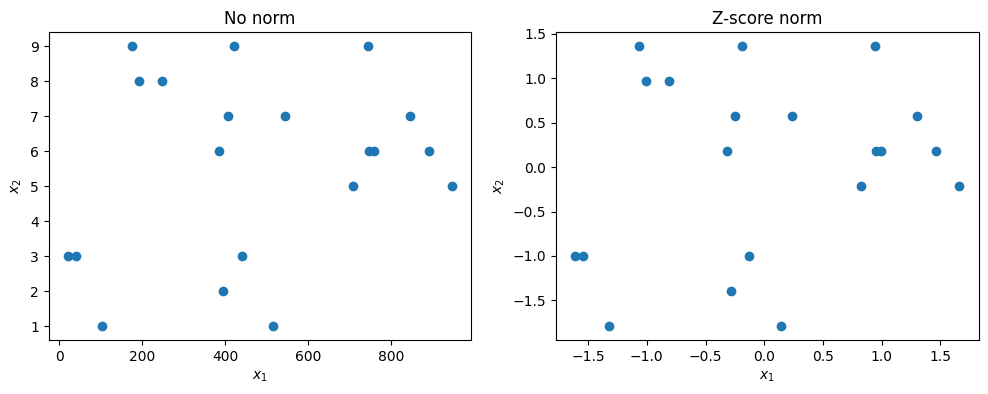

In [17]:
def zscore_norm(xvec):
    return (xvec - np.mean(xvec)) / np.std(xvec)

x_1 = np.random.randint(0, 1000, (20,))
x_2 = np.random.randint(0, 10, (20,))

# Make 3 subplots, one per option, then graph each function
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 4)
ax[0].set_ylabel("$x_2$")
ax[0].set_xlabel("$x_1$")
ax[0].set_title("No norm")
ax[0].plot(x_1, x_2, linestyle="",marker="o")

ax[1].set_ylabel("$x_2$")
ax[1].set_xlabel("$x_1$")
ax[1].set_title("Z-score norm")
ax[1].plot(zscore_norm(x_1), zscore_norm(x_2), linestyle="",marker="o")

#### Clipping
Given $\vec{x}$ plus user-defined minimum and maximum thresholds, this method assigns extremely large outliers to the maximum and extremely small outliers to the minimum. Unlike the other methods, this only modifies a subset of values and may have no effect if the dataset lacks outliers.

$$
\vec{x}' =
\begin{cases}
x > \text{user}_{max}: & x := \text{user}_{max} \\
x < \text{user}_{min}: & x := \text{user}_{min}
\end{cases}
$$

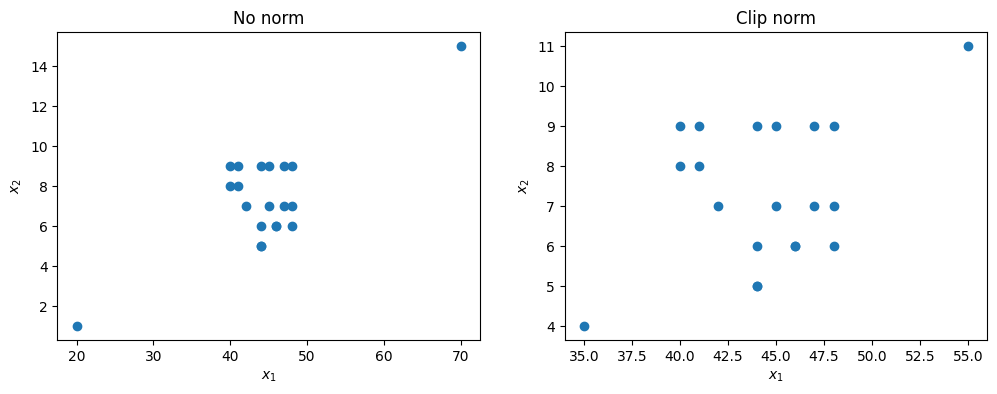

In [31]:
def clip_norm(xvec, umin, umax):
    xnew = np.copy(xvec)
    xnew[xvec > umax] = umax
    xnew[xvec < umin] = umin
    return xnew

x_1 = np.random.randint(40, 50, (18,))
x_1 = np.append(x_1, 20)
x_1 = np.append(x_1, 70)
x_2 = np.random.randint(5, 10, (18,))
x_2 = np.append(x_2, 1)
x_2 = np.append(x_2, 15)

# Make 3 subplots, one per option, then graph each function
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 4)
ax[0].set_ylabel("$x_2$")
ax[0].set_xlabel("$x_1$")
ax[0].set_title("No norm")
ax[0].plot(x_1, x_2, linestyle="",marker="o")

ax[1].set_ylabel("$x_2$")
ax[1].set_xlabel("$x_1$")
ax[1].set_title("Clip norm")
ax[1].plot(clip_norm(x_1, 37, 55), clip_norm(x_2, 4, 11), linestyle="",marker="o")

#### Mean
Given $\vec{x}$, this method subtracts the mean $\mu$, then divides by the difference between the largest and smallest values within $\vec{x}$. The values always sum to 0 with a maximum span of 1 between smallest and largest values. In other words, ${x_{max}-x_{min}} = 1$ after normalization. Because the values cluster near the origin, they are all relatively small.

$$
\begin{align}
\mu = & \frac{1}{n} \cdot \sum\limits^n_{i=1}x_i \\
\vec{x}' = & \frac{\vec{x}-\mu}{x_{max}-x_{min}}
\end{align}
$$

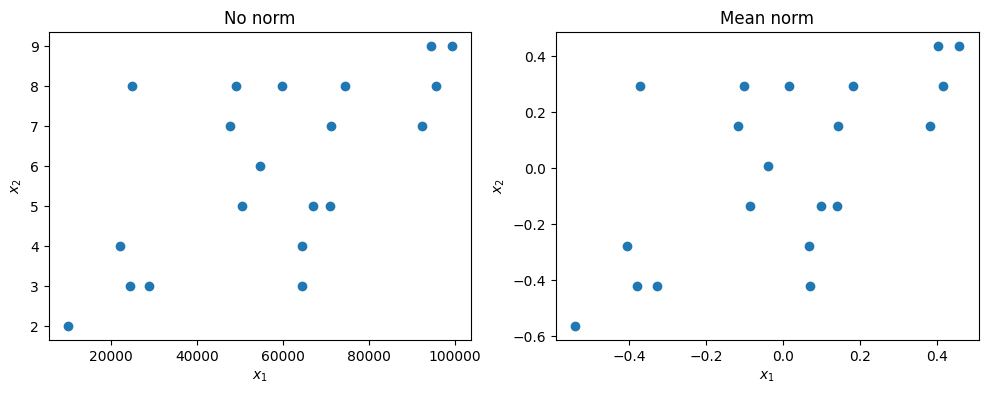

In [22]:
def mean_norm(xvec):
    return (xvec - np.mean(xvec)) / (np.max(xvec) - np.min(xvec))

x_1 = np.random.randint(0, 100000, (20,))
x_2 = np.random.randint(0, 10, (20,))

# Make 3 subplots, one per option, then graph each function
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 4)
ax[0].set_ylabel("$x_2$")
ax[0].set_xlabel("$x_1$")
ax[0].set_title("No norm")
ax[0].plot(x_1, x_2, linestyle="",marker="o")

ax[1].set_ylabel("$x_2$")
ax[1].set_xlabel("$x_1$")
ax[1].set_title("Mean norm")
ax[1].plot(mean_norm(x_1), mean_norm(x_2), linestyle="",marker="o")

#### Linear
Given $\vec{x}$, this method subtracts the smallest value within $\vec{x}$, then divides by the difference between the largest and smallest values within $\vec{x}$. It works when the feature is uniformly distributed (evenly spaced) across a range. Results are guaranteed to be between 0 and 1. It is sometimes called "min max" normalization as well.

$$
\vec{x}' = \frac{\vec{x}-x_{min}}{x_{max}-x_{min}}
$$

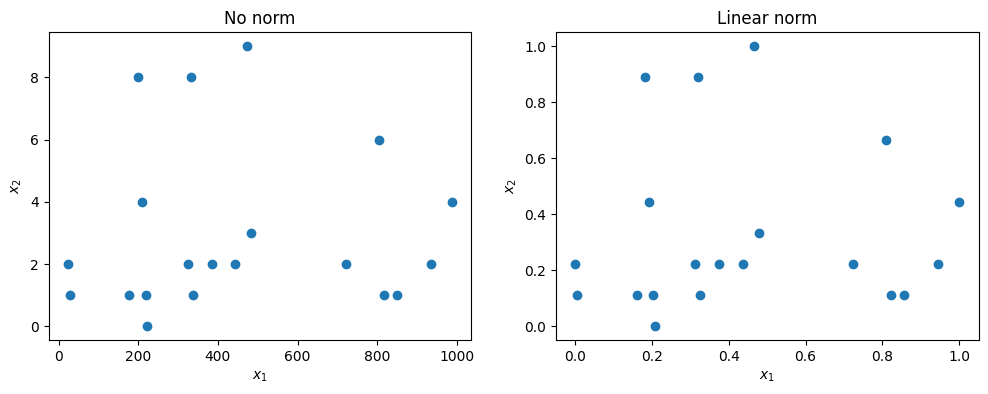

In [34]:
def linear_norm(xvec):
    return (xvec - np.min(xvec)) / (np.max(xvec) - np.min(xvec))

x_1 = np.random.randint(0, 1000, (20,))
x_2 = np.random.randint(0, 10, (20,))

# Make 3 subplots, one per option, then graph each function
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 4)
ax[0].set_ylabel("$x_2$")
ax[0].set_xlabel("$x_1$")
ax[0].set_title("No norm")
ax[0].plot(x_1, x_2, linestyle="",marker="o")

ax[1].set_ylabel("$x_2$")
ax[1].set_xlabel("$x_1$")
ax[1].set_title("Linear norm")
ax[1].plot(linear_norm(x_1), linear_norm(x_2), linestyle="",marker="o")

#### Logarithmic
Given $\vec{x}$ and a user-specific log base $b$, this method applies a logarithm to "power law" feature values (ie, it looks like $f(x) = \frac{1}{x}$ on a plot). The result is data better suited to linear arithmetic. Cannot be used with input value of 0 unless this case is explicitly handled in the implementation.

$$
\vec{x}' = \log_b(\vec{x})
$$

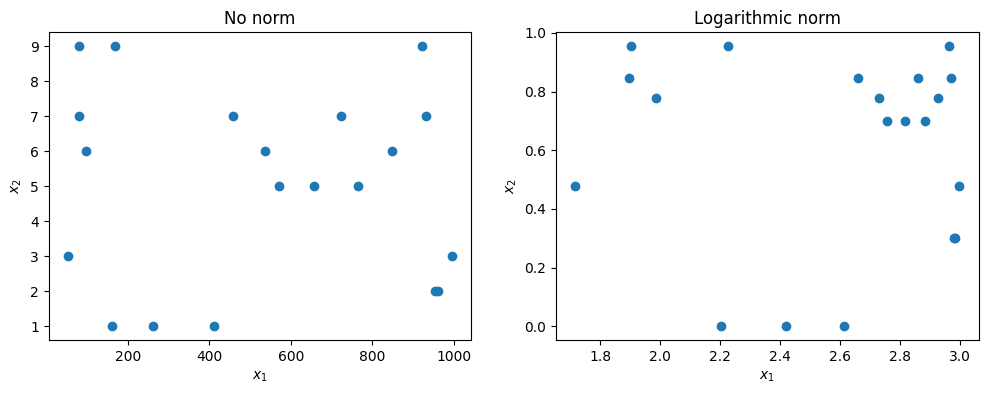

In [37]:
def logarithmic_norm(xvec, base=10):
    return np.emath.logn(base, xvec)

x_1 = np.random.randint(1, 1000, (20,))
x_2 = np.random.randint(1, 10, (20,))

# Make 3 subplots, one per option, then graph each function
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 4)
ax[0].set_ylabel("$x_2$")
ax[0].set_xlabel("$x_1$")
ax[0].set_title("No norm")
ax[0].plot(x_1, x_2, linestyle="",marker="o")

ax[1].set_ylabel("$x_2$")
ax[1].set_xlabel("$x_1$")
ax[1].set_title("Logarithmic norm")
ax[1].plot(log_norm(x_1), logarithmic_norm(x_2), linestyle="",marker="o")

### Backward Propagation

#### Overview
This section describes the process by which the model computes derivates with respect to its parameters at each layer.

$\frac{\partial L}{\partial Z^{[l]}} = \frac{\partial J}{\partial A^{[l]}} \cdot \frac{\partial g^{[l]}}{\partial Z^{[l]})}$

$\frac{\partial L}{\partial A^{[l-1]}} = W^{{[l]}^{T}} \bullet \frac{\partial J}{\partial Z^{[l]}}$

$\frac{\partial L}{\partial W^{[l]}} = \frac{1}{m} \cdot (\frac{\partial J}{\partial Z^{[l]}} \bullet A^{{[l-1]}^{T}})$

$\frac{\partial L}{\partial b^{[l]}} = \frac{1}{m} \cdot \sum\limits^{m}_{i=1}\frac{\partial J}{\partial Z^{[l](i)}}$

### Optimization Algorithms

#### Overview
This section describes algorithms to train a model given a cost function, its derivative, plus weights and biases computed through forward propagation.

#### Batch gradient descent
Update the weights $W$ and biases $b$ at a given layer $[l]$ after a full pass of the training set. It subtracts the product of the learning rate $\alpha$ and derivative with respect to the value $\frac{\partial J}{\partial value^{[l]}}$ in question. The derivative determines the value's contribution to the total cost $J$. If the value was a major contributor to the total cost, the derivative will be a large positive or negative number. Negative derivatives will result in a positive change the value, bringing it closer to 0. Positive derivatives achieve the same goal in the opposite direction, reducing the value to bring it closer to 0.

$W^{[l]} := W^{[l]} - \alpha \cdot \frac{\partial J}{\partial W^{[l]}}$

$b^{[l]} := b^{[l]} - \alpha \cdot \frac{\partial J}{\partial b^{[l]}}$

#### Mini-batch gradient descent
When the number of training examples $m$ is large, batch gradient descent cannot act until all training examples have been processed. Minibatches break up this process, allowing gradient descent to act sooner, albeit without seeing the entire training set. This makes the weight and bias adjustments less precise but faster and more frequent.

#### Gradient descent with momentum
> higher \beta accounts for more/order data, less responsive to recent changes
> averages over 1/1-B entries (rough estimate)

$V_{0}=0$

$V_{t}=\beta \cdot V_{t-1} + (1-\beta)\cdot\theta_{t}$

$V_{t\_bcorr} = \frac{V_{t}}{1-\beta^{t}}$

#### Adam
Exponentially weighted averages

Root Mean Squared (RMS)

$$
\begin{cases}
v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W^{[l]} } \\
v^{corrected}_{dW^{[l]}} = \frac{v_{dW^{[l]}}}{1 - (\beta_1)^t} \\
s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W^{[l]} })^2 \\
s^{corrected}_{dW^{[l]}} = \frac{s_{dW^{[l]}}}{1 - (\beta_2)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{dW^{[l]}}}{\sqrt{s^{corrected}_{dW^{[l]}}} + \varepsilon}
\end{cases}
$$

#### Optional: Gradient Checking
This technique is used for troubleshooting, not training, and can determine if your gradients (derivatives) have been computed correctly. Consider this definition of a derivative that includes sampling on both sides of the function:

$$
\frac{\partial}{\partial \theta_i}J(\vec{\theta}) = \lim_{\varepsilon \to 0}
\frac{J(\theta_1, \theta_2, \cdots, \theta_i + \varepsilon) -
J(\theta_1, \theta_2, \cdots, \theta_i - \varepsilon)}{2 \cdot \varepsilon}
$$

In this context, $\vec{\theta}$ is a 1D vector that contains all of the weights $W$ and biases $b$. The weight matrices are unrolled into one dimension and the biases are concatenated afterwards. This process repeats for every layer, resulting in a giant vector.

Next, repeat this flattening process for all of the derivatives computed with respect to each parameter $W$ and $b$. These derivatives are the result of back propagation and are the specific values that gradient checking will validate. Let's call this vector of gradients $\partial{\vec{\theta}}$ for short which has the same length as $\vec{\theta}$.

The gradient checking algorithm iterates over elements of $\vec{\theta}$, computing the cost using fixed values for each element in $\vec{\theta}$ except for the current one under evaluation $\theta_i$. This is how we approximate the derivatives with respect to individual parameters; we must fix all other elements of $\vec{\theta}$ and only change $\theta_i$ up by a tiny amount $\varepsilon$. The algorithm stores these gradient approximations in a vector that is also the same length as $\vec{\theta}$ and $\partial{\vec{\theta}}$. This new vector is $\partial{\vec{\theta}}_a$ with subscript $a$ indicating "approximate".

Theoretically, the derivatives computed by backward propagation should equal the approximated derivatives computed by gradient checking. In reality, the values will be slightly different. We can measure the similarity of these two vectors using a normalized variant of Euclidean distance.

$$
d = \frac{\|\partial{\vec{\theta}}_a - \partial{\vec{\theta}}\|_2}{\|\partial{\vec{\theta}}_a\|_2 + \|\partial{\vec{\theta}}\|_2}
$$

If the resulting distance $d$ is less than a tiny threshold, such as $1 \times 10^{-7}$, then backward propagation has computed the correct gradients. If the resulting distance is too large, it suggests a software bug. Examine the two gradient vectors closely and look for pairwise values that have large differences. This indicates the specific parameter at the specific layer where the bug is likely to be.

Note that the cost function $J(\vec{\theta})$ must include regularization, if applied, when performing gradient checking. If not, the approximated gradients and backprop-computed gradients will be very different. Also, gradient checking cannot work with dropout regularization as the cost function is not well-defined. You can use `keep_prob = 1` temporarily to run gradient checking on models using dropout.

#### Optional: Learning Rate Decay
This optional enhancement allows the learning rate $\alpha$ to send to slowly decrease (decay) as gradient descent runs. This may reduce oscillations near the global minimum, thus speeding up training. As $t$ increases over time, $\alpha$ decays more slowly, regardless of the implementation. Several plausible options are shown here; many others also exist.

1. Reduce the learning rate $\alpha$ with each epoch $t$ based on a specified rate of decay $r$ based on some initial learning rate $\alpha_0$. Larger values of $r$ yield faster rates of decay (faster reduction of $\alpha$), although values slightly greater than 0 are most reasonable. This update occurs after every iteration.

$$
\alpha = \frac{\alpha_{0}}{1+(r \cdot t)}
$$

2. Reduce the learning rate $\alpha$ after a certain number $n$ epochs $t$. This is a step-based decay using the mathematical "floor" function. A smaller value of $n$ yields more rapid decay as the learning rate changes more frequently.
$$
\alpha = \frac{\alpha_{0}}{1+\lfloor{\frac{t}{n}}\rfloor}
$$

3. Alternative implementation to per-iteration decay, relying on base $b \in \mathbb{R}\,|\,0 < b < 1$. It decays more rapidly at first, whereby smaller values of $b$ yield faster rates of decay in general. Values slightly less than 1 are most reasonable.
 
$$
\alpha = \alpha_{0} \cdot b^{t}
$$

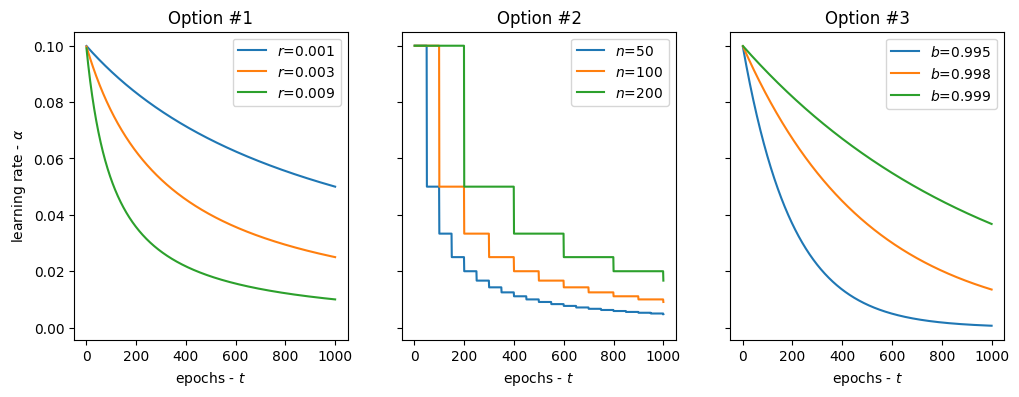

In [15]:
# Run with 1000 epochs and an initial learning rate
t = np.arange(1, 1001, 1, dtype=int)
a0 = 1.0e-01

# Make 3 subplots, one per option, then graph each function
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
fig.set_size_inches(12, 4)
ax[0].set_ylabel(r"learning rate - $\alpha$")

for r in np.array([1.0e-3, 3.0e-3, 9.0e-3]):
    ax[0].plot(t, a0 / (1 + r * t), label=f"$r$={r}")

for n in np.array([50, 100, 200]):
    ax[1].plot(t, a0 / (1 + np.floor(t / n)), label=f"$n$={n}")

for b in np.array([0.995, 0.998, 0.999]):
    ax[2].plot(t, a0 * np.power(b, t), label=f"$b$={b}")

for i, axis in enumerate(ax, start=1):
    axis.set_title(f"Option #{i}")
    axis.set_xlabel("epochs - $t$")
    axis.legend()